In [0]:
import pandas as pd
import numpy as np

from glob import glob                       #Work to import dir of image
from IPython.display import Image, display  # For displaying the image
import cv2  
import io                                #Convert List of image into array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving testset.csv to testset.csv
Saving trainset.csv to trainset.csv


In [4]:
!ls "/content/drive/My Drive/Ballot/"

08_SR_V1.ipynb	Test  testset  Train  trainset


In [5]:
train_set = pd.read_csv(io.StringIO(uploaded['trainset.csv'].decode('utf-8')))
train_set.head(5)

,Data,Label
0,600795.jpeg,10
1,627152.jpeg,10
2,119963.jpeg,10
3,118264.jpeg,10
4,199420.jpeg,10


In [6]:
test_set = pd.read_csv(io.StringIO(uploaded['testset.csv'].decode('utf-8')))
test_set.head(5)

,Data,Label
0,632755.jpeg,10
1,496855.jpeg,10
2,155390.jpeg,10
3,265013.jpeg,10
4,496360.jpeg,10


(array([1000., 1000., 1000.,  800., 1000., 1000.,  800., 1000., 1000.,
       1000.]), array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]), <a list of 10 Patch objects>)
(array([148., 212., 306., 188., 334., 388., 292., 246., 224., 271.]), array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]), <a list of 10 Patch objects>)


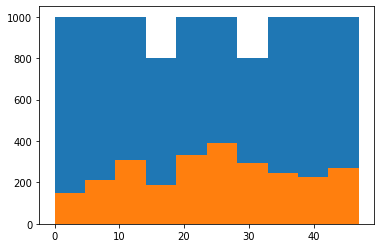

In [7]:
import matplotlib.pyplot as plt

#train_Set label frequency 
label1 = train_set['Label']
print(plt.hist(label1))

#test_Set label frequency 
label2 = test_set['Label']
print(plt.hist(label2))

In [0]:
#To load training set
image_path = '/content/drive/My Drive/Ballot'
import tensorflow as tf
import os
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    train_image_files = sorted([os.path.join(path, 'trainset', file)
                          for file in os.listdir(path + "/trainset")
                          if file.endswith('.jpeg')])
    return train_image_files

In [0]:
train_images = loadImages(image_path)

In [0]:
X_train = []
for image in train_images:
  image_tr = cv2.imread(image)
  # print(image_tr)
  X_train.append(image_tr)

In [0]:
#To load test image from folder
def loadImages1(path):
  '''Put files into lists and return them as one list with all images 
     in the folder'''
  test_image_files = sorted([os.path.join(path, 'testset', file)
                          for file in os.listdir(path + "/testset")
                          if file.endswith('.jpeg')])
 
  return test_image_files

test_images = loadImages1(image_path)

In [0]:
X_test = []
for image_ in test_images:
  image_tes = cv2.imread(image_)
  # print(image_tr)
  X_test.append(image_tes)

In [0]:
print('The shape of X_train:', np.array(X_train).shape)
print('The shape of X_test:', np.array(X_test).shape)

In [0]:
label_train = train_set['Label'].to_numpy()
y_train = label_train[0:1000]
y_train.shape

In [0]:
label_test = test_set['Label'].to_numpy()
y_test = label_test[0:300]
y_test.shape

In [0]:
#get the length of the train and test data
ntrain = len(X_train)
ntest = len(X_test)

In [0]:
#batch size: should be the factor of 2
batch_size = 32

### Model Building

In [0]:
import tensorflow as tf

#Using mobilenet_v2 pretrained architecture to train model
# model=tf.keras.applications.ResNet50()

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (618,425,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #Droupout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

In [0]:
model.summary()

In [0]:
#compile our model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [0]:
#let's create the augmentation configuration
train_datagen = ImageDataGenerator(rescale = 1./255,   #Scale the image btn 0 & 1
                                   rotation_range = 40,
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
# Perform only rescale , we donot augment testing data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [0]:
#create the image generator
train_generator = train_datagen.flow(X_train,y_train,batch_size = batch_size)
test_generator = test_datagen.flow(X_test, y_test, batch_size= batch_size)

In [0]:
#The training part
#We train the epochs with about 100 steps per epoch

history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain // batch_size,#// gives absolute value as 31 instead of 31.218
                              epochs = 100,
                             validation_data = test_generator,
                            validation_steps = ntest // batch_size)